In [1]:
# Load libraries

import pandas as pd
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import cross_val_score
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

%matplotlib inline
plt.style.use('default')

**Retrieving local version of iris dataset**

In [2]:
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

df = pd.read_csv('./data/iris.csv', names = attributes)

**First look**

In [3]:
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [5]:
print(df.shape)

(150, 5)


In [6]:
# Check if any missing data 
no_of_columns = df.shape[0]
percentage_of_missing_data = df.isnull().sum()/no_of_columns
print(percentage_of_missing_data)

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
class           0.0
dtype: float64


**Descriptive Statistics**

In [7]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [8]:
print(df.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


**EDA**

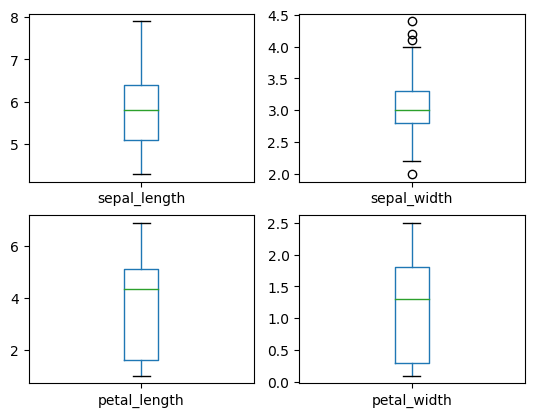

In [9]:
# First some small box and whisker plots
df.plot(kind='box', subplots = True, layout = (2,2), sharex = False, sharey = False)
pyplot.show()

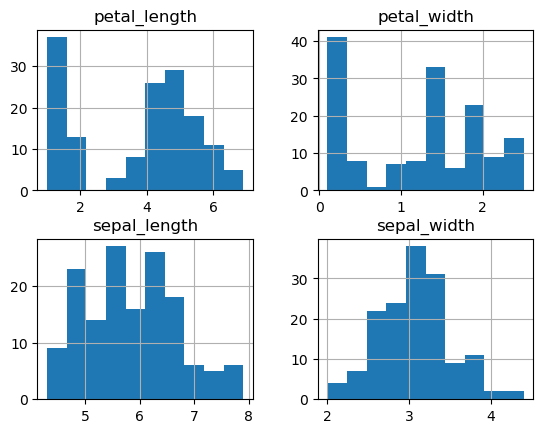

In [10]:
# histograms

df.hist()
pyplot.show()

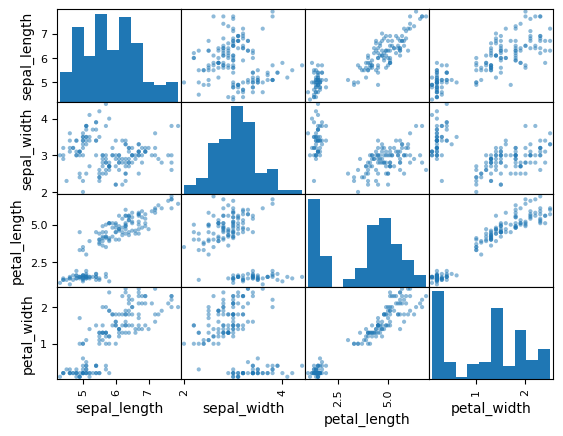

In [11]:
# scatter plot matrix

scatter_matrix(df)
plt.show()

# We can see relationships between some of our continuous variables 
#(where we see a diagional line)

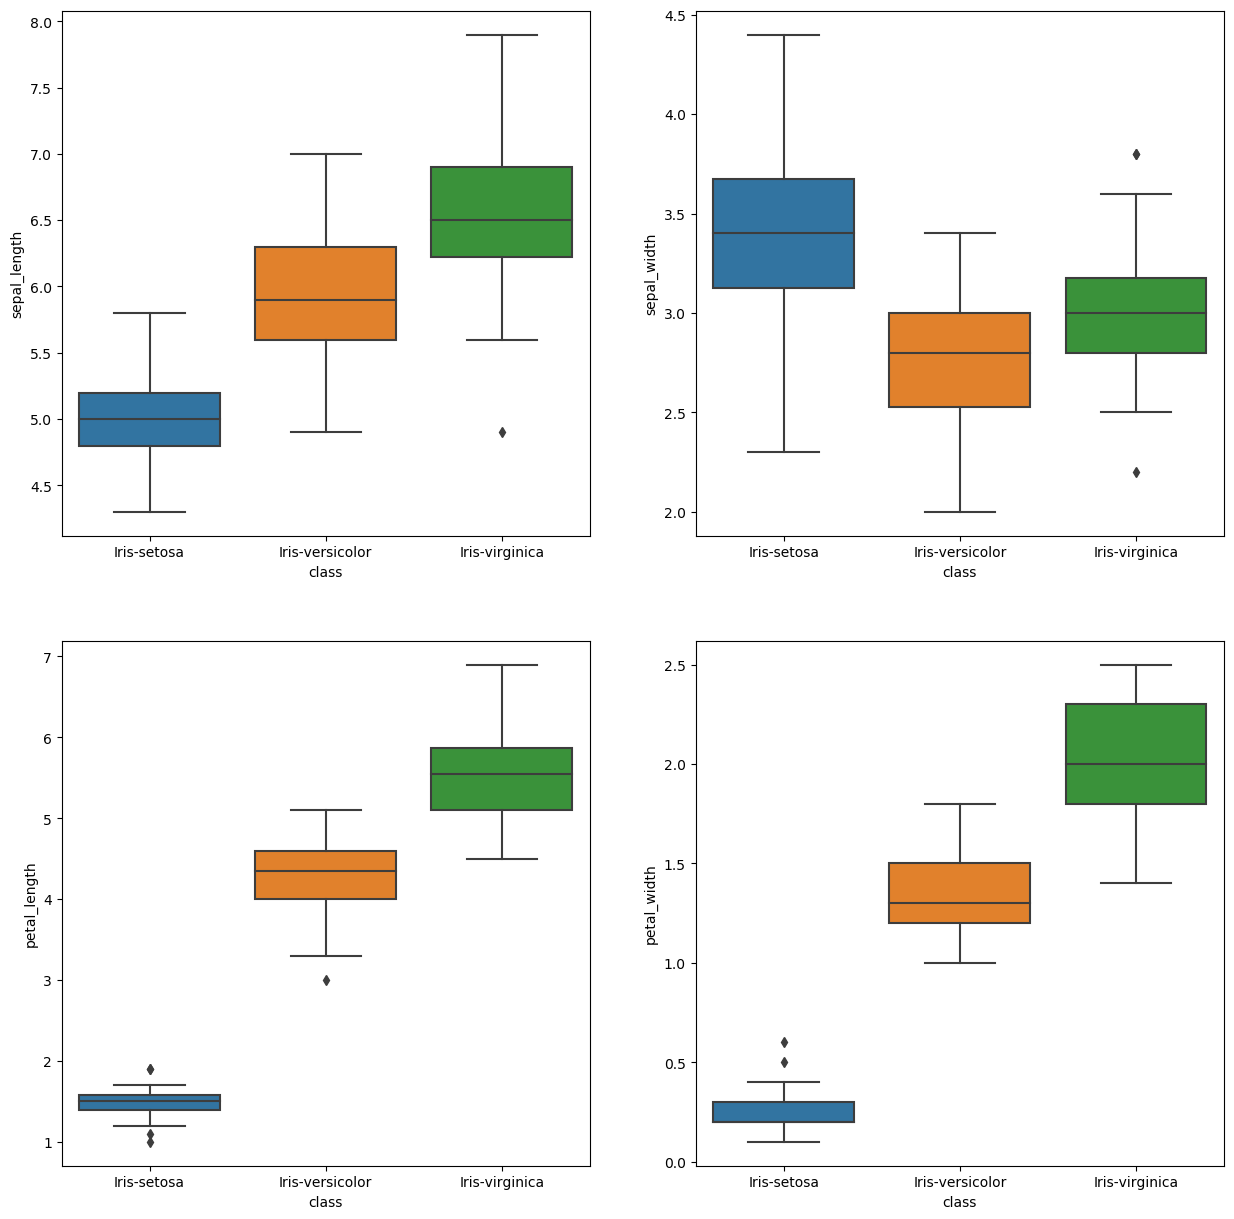

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, 
                                             ncols = 2,
                                            figsize = (15,15))
sns.boxplot(x = "class", y = "sepal_length", data = df, ax = ax1)
sns.boxplot(x = "class", y = "sepal_width", data = df, ax = ax2)
sns.boxplot(x = "class", y = "petal_length", data = df, ax = ax3)
sns.boxplot(x = "class", y = "petal_width", data = df, ax = ax4)

# We can start to see how our predictor variables can be used to 
# classify flowers

# Creating our model

I decided to use knn because we have a small data set and it's baby's first machine learning project

## First check if knn is an accurate model for the dataset

**Creating our test-train split**

In [30]:
X = df.drop('class', axis = 1).values
y = df['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Check which number of neighbors would work**

I quickly check if there's a number of neighbors that seems to work better than others.
The following graph shows us, for our dataset, they all roughly work the same. This could be due to a number of reasons: the size of our test samples, the flowers are very easy to classify based on our predictor variables.

Due to the discrepancy between the test and training accuracy, it is likely the small sample size.

Due to our small sample size, I decide to use 5 neighbors, as it seems to be in the goldilocks zone for size, and fairly accurate in our training set.

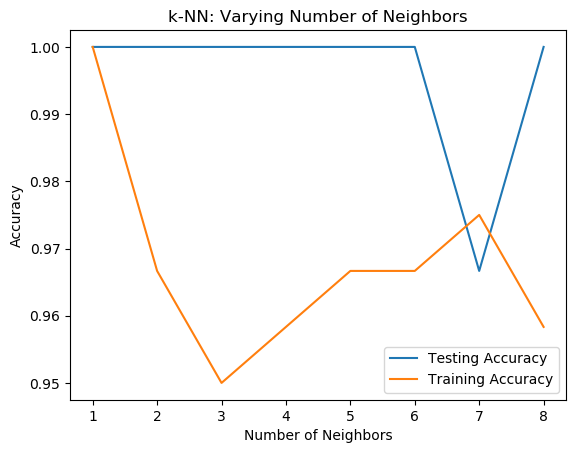

In [40]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

**Let's use cross-validation to check our model is accurate**

In [44]:
knn = KNeighborsClassifier(n_neighbors = 5)

# n = KFold(X.shape[0])
# mse = make_scorer(mean_squared_error)

# cv_results = cross_val_score(knn, X, y, scoring = mse, cv = n)

scores = cross_val_score(knn, X = X, y = y, cv = KFold(X.shape[0]))

print("LOOCV Score: {}".format(np.mean(scores)))

LOOCV Score: 0.9666666666666667


# Now it's time to actually make predictions

In [47]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [51]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# Future Discussion

I would strongly, strongly, strongly recommend working with a larger dataset to be able to work with more nuance with the model.